----------------------
# Machine Learning and Statistics - Project 2020
### Eoin Lees - G00387888 - January 2021
--------------

# Instructions

In this project you must create a web service that uses machine learning to make predictions
based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:

1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.

To enhance your submission, you might consider developing and comparing more than
one model. Rest assured, all the above concepts will be explored in lecture videos and
other materials in the coming semester.


---------------------------
# Introduction

---------------------------















## Simple linear regression


**What is regression analysis?**
"Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable and one or more independent variables."[[1]](https://en.wikipedia.org/wiki/Regression_analysis)

"Linear regression is the most widely used statistical technique; it is a way to model a relationship between two sets of variables. The result is a linear regression equation that can be used to make predictions about data." [[2]](Linear regression is the most widely used statistical technique; it is a way to model a relationship between two sets of variables. The result is a linear regression equation that can be used to make predictions about data.)

## Complex regression

Regression can come in a number of different forms; linear, multiple linear and non linear. For linear relationships, as you increase the independent variable by one unit, the mean of the dependent variable always changes by a specific amount.[[3]](https://statisticsbyjim.com/regression/curve-fitting-linear-nonlinear-regression) 
This is not always the case, especially in real world scenarios. Often there are curved relationships between the variables. In a curved relationship the effect of the independent variable is not a constant value. 

You can fit curves using linear regression. It is common to use polynominal terms in a linear model. Polynomial terms are independent variables that you raise to a power, such as squared or cubed terms.[[3]](https://statisticsbyjim.com/regression/curve-fitting-linear-nonlinear-regression) 
By counting the number of bends in a line it is possible to quickly determine the correct terms to use. Take the number of bends in your curve and add one for the model order that you need.

Below are examples of polynomial curves:[[3]](https://statisticsbyjim.com/regression/curve-fitting-linear-nonlinear-regression)

Linear | Quadratic | Cubic
:-: | :-: | :-:
 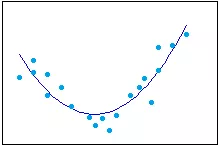 | 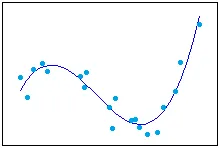 | 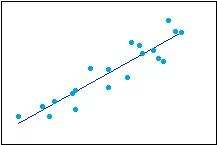 



## Dataset


This analysis is performed on a dataset that shows how much power is produced by a wind turbine depending on a specific wind speed. It is available for download from the github of user ianmcloughlin for the purpose of this exercise. [[4]](https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv)

The dataset consists of two columns of values, `speed` and `power` with 500 entries in each. Each wind speed value corrosponds to the power produced value directly. 





## Import modules and plot styles
---------------------

In [1]:
#Import Modules
import pandas as pd
import matplotlib.style as style
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

import tensorflow.keras as kr


In [2]:
# Check Stlyes available for plots and set style
style.available
style.use('fivethirtyeight')

## Import Data
------------------------

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


## Initial  analysis and plots
-----------------------

In [4]:
# Desribe Variables
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


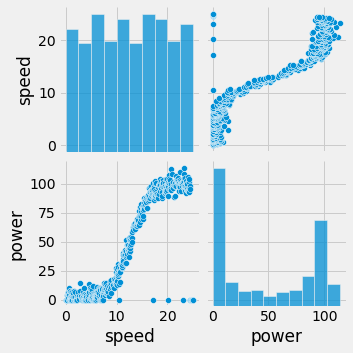

In [5]:
# Pairplot to get initial view of data.
sns.pairplot(df, palette="tab20c_r")

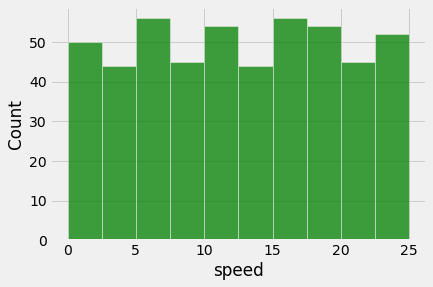

In [6]:
# Speed plotted againt count
sns.histplot(data=df, x="speed", color='g')
plt.show()

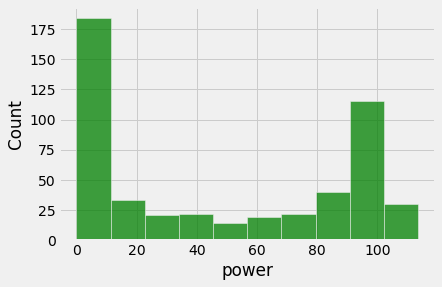

In [7]:
# Power plotted againt count
sns.histplot(data=df, x="power", color='g')
plt.show()

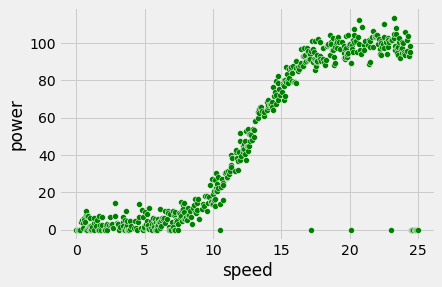

In [8]:
# Seaborn scatterplot of wind speed vs power

sns.scatterplot(data=df, x="speed", y="power", color='g')
plt.show()

#### Describe

Running the `df.describe()`[[5]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function gives a summary of all the data in the dataframe.

It gives us the limits of the data along with the mean values and standard deviations. These values can be usefull in simulating data. This function also gives us a good understanding of teh data in the function. 

#### Pairplot

Running `sns.pairplot()`[[6]](https://seaborn.pydata.org/generated/seaborn.pairplot.html) on a dataset is a good starting off point in understanding the relationship of variables. It provides us with all the the various plots we need to decide what to look at next. 

#### Speed plot

The speed plot was created using `sns.histplot()`[[7]](https://seaborn.pydata.org/generated/seaborn.histplot.html) and shows us that the speed roughly uniformly distributued. [[8]](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

#### Power plot

The power plot again was created using `sns.histplot()`.[[7]](https://seaborn.pydata.org/generated/seaborn.histplot.html)

It reveals some interesting information. Over 175 of the points  out of 500 are plotted are in the 0-10 power bracket suggesting that there is a threshold speed that must be reached in order for any power to be generated. 

#### Speed vs Power

The speed vs Power plot was created using `sns.scatterplot()`.[[9]](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) It shows the relationship between the two variables. 

This relationsship is not linear. It has two distinct curves. 

There are also a number of 0 power points at wind speeds above 10. This is not consistent with the rest of the data. 


## Clean the data set
-------------------------------

In [9]:
# outlier datapoints
df_out = df[(df["speed"]>10) & (df["power"]==0)]

print(df_out)
df_out.count()

      speed  power
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


speed    14
power    14
dtype: int64

In [10]:
# remove the outliers
dfClean = df.drop(df_out.index, axis=0)

# Output as csv 
dfClean.to_csv("powerproduction.csv", index=False, encoding='utf8')

In [11]:
# Describe new data
dfClean.describe()

,speed,power
count,486.000000,486.000000
mean,12.298311,49.397720
std,7.084043,41.391996
min,0.000000,0.000000
25%,6.137250,5.868250
50%,12.349500,44.773000
75%,18.386750,93.751250
max,24.399000,113.556000


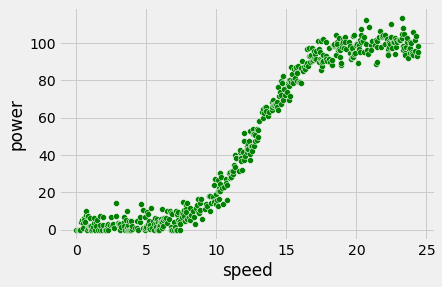

In [12]:
# New data Seaborn scatterplot of wind speed vs power

sns.scatterplot(data=dfClean, x="speed", y="power", color='g')
plt.show()

#### Identify outliers

The data that was identified as an outlier was any point that had a power value of 0 and a speed value greater than 10.

The outliers were identified using `df_out = df[(df["speed"]>10) & (df["power"]==0)]`.  The summary showed 14 datapoints that met this criteria. 

#### Removing outliers and saving 

The outliers were removed using `df.drop()`.[[10]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

A new dataset was created and saved to csv.

#### Review new data

After removing the outliers the average speed & max speed of the dataset have been reduced. 

Plotting Speed vs. Power again we can verify that the data is now more usable. 

--------------------------
# Linear Regression
-------------------------

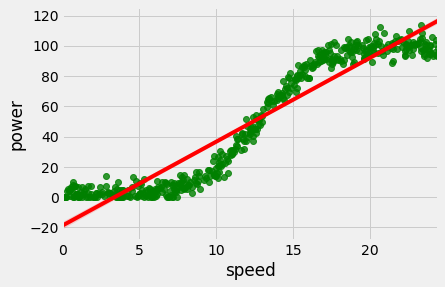

In [13]:
# Use seaborn regplot
sns.regplot(data=dfClean, x="speed", y="power",scatter_kws={"color": "green"}, line_kws={"color": "red",'linewidth':4});

### Method 1 -   Seaborn: Regplot

The seaborn module has a simple regression command called regplot. 

`sns.regplot()`: Plot data and a linear regression model fit.[[11]](https://seaborn.pydata.org/generated/seaborn.regplot.html)

**Results**

Taking the dataset and running it through this command we see the regression line plotted in red. As it is a simple linear regression line it does not accurately fit the data. 

-------------------------


------------------
# Complex Linear regression
----------------

#### Polynominal regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y. [[14]](https://en.wikipedia.org/wiki/Polynomial_regression)

A polynomial regression line has an equation of the form:

$$ y = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \beta_{3}x^3 \dotsb + \beta_{n}x^n + \varepsilon \hspace{1cm}  $$[[14]](https://en.wikipedia.org/wiki/Polynomial_regression)

Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function E(y|x) is linear in the unknown parameters that are estimated from the data. 

NumPy's polyfit function can be used to developed a polynomial model using the method of least squares.

The NumPy polyfit function solves for the 'best fit' coefficients of the polynomial regression model for the inputted data

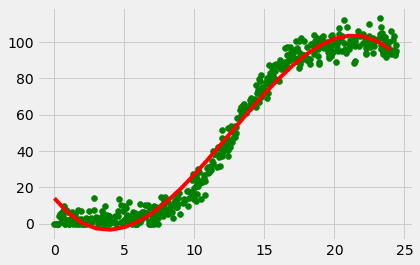

a: -9.674071378697455 b: 1.4937731793437792 c: -0.03952067527853641 d: 13.959602264553936


In [17]:
# fit a third degree polynomial 
 
# define the true objective function
def objective(x, a, b, c, d):
    return (a * x) + (b * x**2) + (c * x**3) + d
 
# load the dataset
data = dfClean.values

# choose the input and output variables
x, y = data[:, 0], data[:, 1]

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b, c, d = popt

# plot input vs output
plt.scatter(x, y, color='g')

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b, c, d)

# create a line plot for the mapping function
plt.plot(x_line, y_line, color='red')
plt.show()
print("a:",a, "b:",b, "c:",c, "d:",d)


### Method 3: Polynominal Regression  - Third order

The method is calculated using the following equation:

$$ y = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \beta_{3}x^3 + \varepsilon \hspace{1cm}  $$


Plotted using `plt.scatter()`: A scatter plot of y vs. x with varying marker size and/or color. [[16]](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html)

The `curve_fit()` function from scikit learn enables the use of non-linear least squares to fit a function, f, to the data  [[17]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) The method of fitting to a function is taken from the examples section of the scikit learn docs. 

**Results**

We see the predicted regression line plotted in red. It matches the plot well. It is not a perfect fit however. 

A drawback of polynomial bases is that the basis functions are "non-local", meaning that the fitted value of y at a given value x = x0 [[15]](https://en.wikipedia.org/wiki/Polynomial_regression)

 

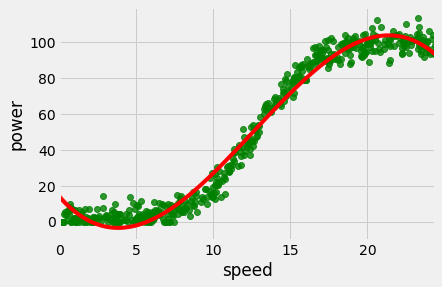

In [18]:
# Seaborn regplot
sns.regplot(data=dfClean, x="speed", y="power", scatter_kws={"color": "green"}, line_kws={"color": "red",'linewidth':4}, order=3);

#### Method 4 -   Seaborn: Regplot third order

The seaborn module has a simple regression command called regplot. 

`sns.regplot()`: Plot data and a linear regression model fit.[[11]](https://seaborn.pydata.org/generated/seaborn.regplot.html)

Unlike scikit learn the regression command in seaborn allows for the addition of the odrder option to specify the order of the polynomial equation. It uses the method explained above. 

**Results**

As the methods used are similar there are similar results created here.  The curve fits the plot closely. It is much less innacurate than simple linear regression. 

-------------------------


## Calculate costs

Calculating the cost of the polyfit line requires the correct formula.

Straight Line Fit: 
$$ \sum_i (y_i - mx_i - c)^2 $$


In [19]:
# Calculate cost 

# Calculate the best values for m and c.
x, y = data[:, 0], data[:, 1]
# First calculate the means (a.k.a. averages) of w and d.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from w and d.
x_zero = x - x_avg
y_zero = y - y_avg

# The best m is found by the following calculation.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * y_zero)
# Use m from above to calculate the best c.
c = y_avg - m * x_avg

# Cost of curve 1

cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m =  1.00 and c = 37.10: 585076.27


In [20]:
np.corrcoef(x, y)[0][1]**2

0.9025487607456797

In [21]:
# Calculate the R-squared value for our data set.
rsq = 1.0 - (np.sum((y - m * x - c)**2) / np.sum((y - y_avg)**2))
rsq
#print("The R-squared value is %6.4f" % rsq)

0.2958940452661887

------------------
# Logistic Regression 
----------------

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.[[19]](https://en.wikipedia.org/wiki/Logistic_regression)

In this case it is wether the turbine is generating power or not. On/off. The slope indicates it is warming up, like a switch. 

We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.[[20]](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148)



--------------------------------
# Keras neural network
----------------------------

#### Neural Networks Introduction

Artificial neural networks, usually simply called neural networks, are computing systems vaguely inspired by the biological neural networks that constitute animal brains.[[27]](https://en.wikipedia.org/wiki/Artificial_neural_network)

An artificial neural network is an interconnected group of nodes, inspired by a simplification of neurons in a brain. Here, each circular node represents an artificial neuron and an arrow represents a connection from the output of one artificial neuron to the input of another.

![NN](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/420px-Colored_neural_network.svg.png)

**Keras**
Keras is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library.[[25]](https://en.wikipedia.org/wiki/Keras)

**TensorFlow**
TensorFlow is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.[[26]](https://en.wikipedia.org/wiki/TensorFlow)

A deep neural network (DNN) is an artificial neural network (ANN) with multiple layers between the input and output layers.

In [23]:
# load the dataset
data = dfClean.values

# choose the input and output variables
x = data[:, 0] 
y = data[:, 1]

In [24]:
# import modules
from sklearn.model_selection import train_test_split

# split data set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
x_train.size, x_test.size, y_train.size, y_test.size

(325, 161, 325, 161)

## Set up model

**Data set up**

The data is split using `train_test_split()` imported from sklearn. [[24]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) It splits arrays or matrices into random train and test subsets. This array was split into 1/3 test data and 2/3 training data. 

Method from machine learning mastery[[23]](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/)


The Training and Test datasets are shown below to demonstrate how they are representative of the overall data. 

Text(0.5, 1.0, 'Test set')

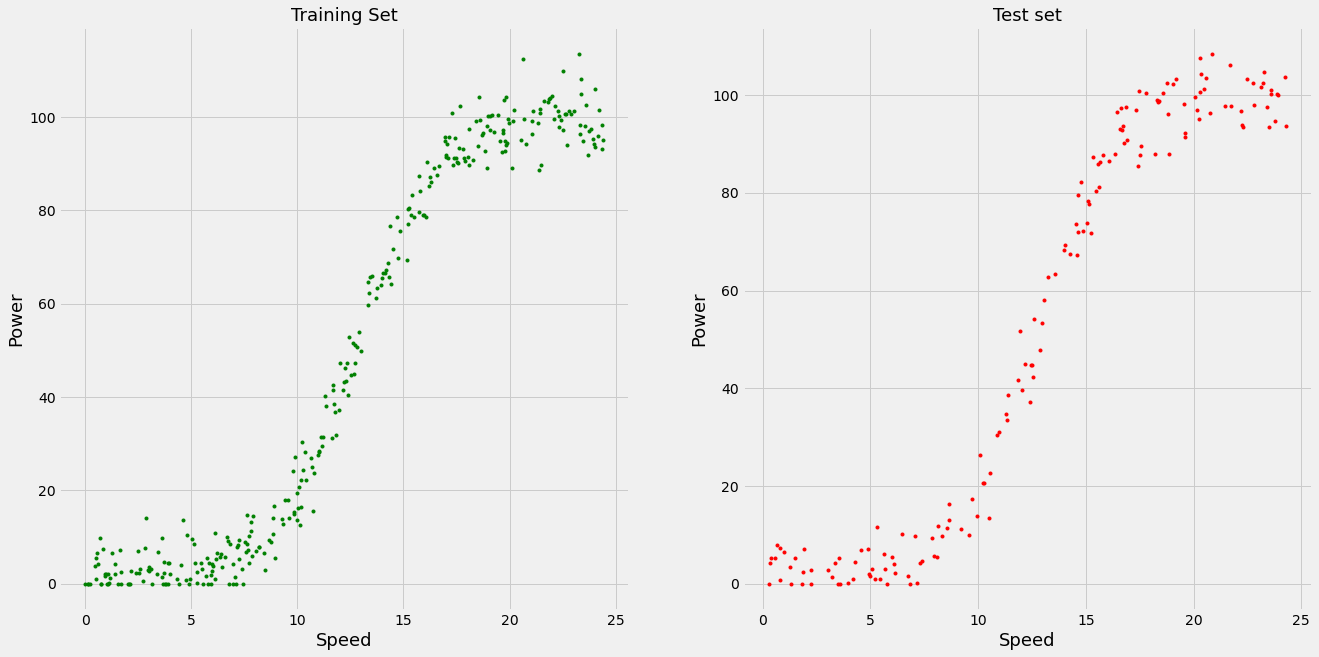

In [55]:
# Set the parameters for the subplots to be created
fig, axes = plt.subplots(1, 2, figsize=(20,10))

# Plot the data set before and after cleaning for comparison purposes
axes[0].plot(x_train, y_train, '.g')
axes[1].plot(x_test, y_test, '.r')

# Add labels 
axes[0].set_xlabel('Speed', fontsize=18)
axes[0].set_ylabel('Power', fontsize=18)
axes[1].set_xlabel('Speed', fontsize=18)
axes[1].set_ylabel('Power', fontsize=18)

# Add titles to subplots
axes[0].set_title('Training Set', fontsize=18)
axes[1].set_title('Test set', fontsize=18)

In [58]:
# Train a model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


## Keras set up

Setting up the model using keras following the example set out in the lecture materail [[21]](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb) [[22]](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-linear.ipynb)

Two layers are set up. The first is avtivated with a sigmoid function. The second linear. They generaly follow the example given in the lecture notes referenced above. 


#### Sigmoid function

"A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. A common example of a sigmoid function is the logistic function shown in the first figure and defined by the formula:"[[18]](https://en.wikipedia.org/wiki/Sigmoid_function)
<br>
<br>
<br>


<center>$$ S(x) = \frac{1}{1+{e}^{-x}} = \frac{{e}^{x}}{{e}^{x}+1}  $$ </center>

<br>
<br>
<br>

<img src="https://miro.medium.com/max/875/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg" width="600">

#### Summary

The summary command allows us to see a summary of the model and the layers it contains.  

In [60]:
model.fit(x_train, y_train, epochs=600, batch_size=10)

Epoch 1/600
33/33 [==============================] - 0s 801us/step - loss: 3688.5173
Epoch 2/600
33/33 [==============================] - 0s 719us/step - loss: 3844.4048
Epoch 3/600
33/33 [==============================] - 0s 782us/step - loss: 3718.6582
Epoch 4/600
33/33 [==============================] - 0s 723us/step - loss: 3427.0145
Epoch 5/600
33/33 [==============================] - 0s 774us/step - loss: 3075.6410
Epoch 6/600
33/33 [==============================] - 0s 689us/step - loss: 3681.5284
Epoch 7/600
33/33 [==============================] - 0s 720us/step - loss: 3116.1327
Epoch 8/600
33/33 [==============================] - 0s 935us/step - loss: 2938.6572
Epoch 9/600
33/33 [==============================] - 0s 758us/step - loss: 2763.6038
Epoch 10/600
33/33 [==============================] - 0s 749us/step - loss: 2499.4821
Epoch 11/600
33/33 [==============================] - 0s 749us/step - loss: 2679.9730
Epoch 12/600
33/33 [==============================] - 0s 1ms/st

Epoch 97/600
33/33 [==============================] - 0s 719us/step - loss: 241.9540
Epoch 98/600
33/33 [==============================] - 0s 688us/step - loss: 237.2970
Epoch 99/600
33/33 [==============================] - 0s 683us/step - loss: 229.0517
Epoch 100/600
33/33 [==============================] - 0s 797us/step - loss: 222.2708
Epoch 101/600
33/33 [==============================] - 0s 624us/step - loss: 210.3553
Epoch 102/600
33/33 [==============================] - 0s 688us/step - loss: 211.8138
Epoch 103/600
33/33 [==============================] - 0s 656us/step - loss: 195.5442
Epoch 104/600
33/33 [==============================] - 0s 653us/step - loss: 198.0822
Epoch 105/600
33/33 [==============================] - 0s 661us/step - loss: 186.5109
Epoch 106/600
33/33 [==============================] - 0s 655us/step - loss: 208.9565
Epoch 107/600
33/33 [==============================] - 0s 653us/step - loss: 169.6750
Epoch 108/600
33/33 [==============================] - 0s

33/33 [==============================] - 0s 845us/step - loss: 56.1879
Epoch 194/600
33/33 [==============================] - 0s 809us/step - loss: 54.5984
Epoch 195/600
33/33 [==============================] - 0s 717us/step - loss: 57.1870
Epoch 196/600
33/33 [==============================] - 0s 742us/step - loss: 52.4490
Epoch 197/600
33/33 [==============================] - 0s 684us/step - loss: 54.5942
Epoch 198/600
33/33 [==============================] - 0s 739us/step - loss: 56.6757
Epoch 199/600
33/33 [==============================] - 0s 616us/step - loss: 54.1152
Epoch 200/600
33/33 [==============================] - 0s 844us/step - loss: 56.3416
Epoch 201/600
33/33 [==============================] - 0s 832us/step - loss: 51.2328
Epoch 202/600
33/33 [==============================] - 0s 750us/step - loss: 52.4824
Epoch 203/600
33/33 [==============================] - 0s 871us/step - loss: 52.2657
Epoch 204/600
33/33 [==============================] - 0s 769us/step - loss: 51

33/33 [==============================] - 0s 743us/step - loss: 31.0002
Epoch 290/600
33/33 [==============================] - 0s 776us/step - loss: 30.9052
Epoch 291/600
33/33 [==============================] - 0s 882us/step - loss: 33.4196
Epoch 292/600
33/33 [==============================] - 0s 844us/step - loss: 29.7371
Epoch 293/600
33/33 [==============================] - 0s 750us/step - loss: 28.8455
Epoch 294/600
33/33 [==============================] - 0s 751us/step - loss: 26.0001
Epoch 295/600
33/33 [==============================] - 0s 750us/step - loss: 29.1945
Epoch 296/600
33/33 [==============================] - 0s 780us/step - loss: 31.2219
Epoch 297/600
33/33 [==============================] - 0s 906us/step - loss: 32.5072
Epoch 298/600
33/33 [==============================] - 0s 875us/step - loss: 28.4680
Epoch 299/600
33/33 [==============================] - 0s 750us/step - loss: 30.1809
Epoch 300/600
33/33 [==============================] - 0s 750us/step - loss: 27

33/33 [==============================] - 0s 809us/step - loss: 21.3415
Epoch 386/600
33/33 [==============================] - 0s 841us/step - loss: 22.7107
Epoch 387/600
33/33 [==============================] - 0s 938us/step - loss: 19.9574
Epoch 388/600
33/33 [==============================] - 0s 876us/step - loss: 18.7788
Epoch 389/600
33/33 [==============================] - 0s 874us/step - loss: 21.6235
Epoch 390/600
33/33 [==============================] - 0s 891us/step - loss: 19.3234
Epoch 391/600
33/33 [==============================] - 0s 1ms/step - loss: 18.1904
Epoch 392/600
33/33 [==============================] - 0s 1ms/step - loss: 19.2323
Epoch 393/600
33/33 [==============================] - 0s 893us/step - loss: 19.9425
Epoch 394/600
33/33 [==============================] - 0s 907us/step - loss: 21.0740
Epoch 395/600
33/33 [==============================] - 0s 856us/step - loss: 20.1844
Epoch 396/600
33/33 [==============================] - 0s 856us/step - loss: 20.586

33/33 [==============================] - 0s 1ms/step - loss: 17.5645
Epoch 483/600
33/33 [==============================] - 0s 1ms/step - loss: 18.4097
Epoch 484/600
33/33 [==============================] - 0s 964us/step - loss: 17.0417
Epoch 485/600
33/33 [==============================] - 0s 970us/step - loss: 16.7527
Epoch 486/600
33/33 [==============================] - 0s 906us/step - loss: 17.9141
Epoch 487/600
33/33 [==============================] - 0s 908us/step - loss: 17.6874
Epoch 488/600
33/33 [==============================] - 0s 998us/step - loss: 18.5489
Epoch 489/600
33/33 [==============================] - 0s 937us/step - loss: 18.9819
Epoch 490/600
33/33 [==============================] - 0s 1ms/step - loss: 18.8782
Epoch 491/600
33/33 [==============================] - 0s 928us/step - loss: 18.3292
Epoch 492/600
33/33 [==============================] - 0s 927us/step - loss: 17.1650
Epoch 493/600
33/33 [==============================] - 0s 969us/step - loss: 18.0217


33/33 [==============================] - 0s 1ms/step - loss: 17.3642
Epoch 580/600
33/33 [==============================] - 0s 1ms/step - loss: 17.4797
Epoch 581/600
33/33 [==============================] - 0s 1ms/step - loss: 17.0074
Epoch 582/600
33/33 [==============================] - 0s 1ms/step - loss: 17.4322
Epoch 583/600
33/33 [==============================] - 0s 1ms/step - loss: 17.8981
Epoch 584/600
33/33 [==============================] - 0s 969us/step - loss: 16.4885
Epoch 585/600
33/33 [==============================] - 0s 983us/step - loss: 17.1725
Epoch 586/600
33/33 [==============================] - 0s 989us/step - loss: 17.8790
Epoch 587/600
33/33 [==============================] - 0s 1ms/step - loss: 18.7261
Epoch 588/600
33/33 [==============================] - 0s 952us/step - loss: 15.8528
Epoch 589/600
33/33 [==============================] - 0s 948us/step - loss: 19.3418
Epoch 590/600
33/33 [==============================] - 0s 991us/step - loss: 15.4414
Epoch 

In [29]:
# Test the model
model.predict([10.0])

array([[20.044592]], dtype=float32)

In [61]:
# Evaluate the training set
model.evaluate(x_train, y_train)

11/11 [==============================] - 0s 702us/step - loss: 16.7325


16.7325382232666

In [62]:
# Evaluate the test set
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 994us/step - loss: 20.1076


20.107566833496094

## Model Training and testing

`model.fit()` trains the model with the supplied data. [[29]](https://www.tensorflow.org/api_docs/python/tf/keras/Model)


An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. If the batch size is the whole training dataset then the number of epochs is the number of iterations.

This model is trained with 600 epochs.

**Results:** 
* Training data set: Loss 16.7325
* Test data set: Loss 20.1076

Similar to calculating the costs on linear regression, the loss is a method of measuring the accuracy of the model. 

"The cost function reduces all the various good and bad aspects of a possibly complex system down to a single number, a scalar value, which allows candidate solutions to be ranked and compared."[[28]](https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/)


## Plot Predictions

In [65]:
# Adapted from [5]
predictions = model.predict(x_test)

In [66]:
model.predict([15.0])

array([[75.64836]], dtype=float32)

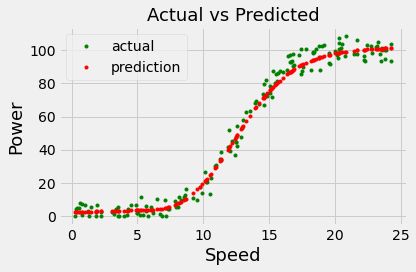

In [52]:
# plot actual power output of test set vs predicted power output for test set
plt.plot(x_test, y_test,  '.g', label='actual')
plt.plot(x_test, predictions, '.r', label='prediction')

# set title
plt.title('Actual vs Predicted', fontsize=18)
plt.xlabel('Speed', fontsize=18)
plt.ylabel('Power', fontsize=18)
#axes[0].set_xlabel('Speed', fontsize=18)
#axes[0].set_ylabel('Power', fontsize=18)

# add legend
plt.legend()
plt.tight_layout()

# Save for html
plt.savefig('actualvspredicted.png')

## Plot analysis

Passing in the x_test values into the model we get a full set of predicted y values that we can plot against the actual y values. 

You can see immidiatly that it is a good fit for the data. There is a good distribution of data points above and below the line. 

It will produce reasonably accurate data based on the data set that was supplied. 

If further data becomes available, it will be quite easy to combine the data with the new data and get a possibly more accurate result. 
___________________________

In [39]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

### Saving model

Keras provides a method of saving the model that was produced for use in other applications. [[30]](https://keras.io/getting_started/faq/#how-can-i-save-a-keras-model)

Whole-model saving means creating a file that will contain:

* the architecture of the model, allowing to re-create the model
* the weights of the model
* the training configuration (loss, optimizer)
* the state of the optimizer, allowing to resume training exactly where you left off.

The default and recommend format to use is the TensorFlow SavedModel format. In TensorFlow 2.0 and higher, you can just do: model.save(your_file_path).

After saving a model in either format, you can reinstantiate it via model = keras.models.load_model(your_file_path).


### Test loading model from .h5 file

In [43]:
from tensorflow.keras.models import load_model
modelTest = load_model('./my_model.h5')

In [44]:
prediction = modelTest.predict([15.0])
print(str(prediction[0][0]))

75.20736


Comparing values from the data set trainied in this notebook and the data set loaded from the save file you can verify that they match. 

-----------------------------------
# Results 
-----------------------------------


### Linear regression



### Keras neural network

The results of the keras model are plotted and analyised above. 

The model can be called directly from the notebook to make predictions. 

### server.py

Along with this notebook a flask app has been developed to use for predicting power output. 

It uses the saved model and takes an input directly from the html page. 

It can be accessed following instruction in the README file.


-----------------------------------
# Conclusions
-----------------------------------

### Regression models

Using third order polynomial regression fit the plot reasonably well. 

It can be used to make predictions based independent on power or speed values. 

This could be used as a base in real world simulations. 

### Keras neural network


**Subject-area knowledge**

Any time you are specifying a model, you need to let subject-area knowledge and theory guide you. Some areas might have standard practices and functions for modeling the data. In this case the data is resented as is, however in a real world situation getting as much information about the function of the wind turbines and the effect the weather and wind speed has on them would be vital. 



---------------------------
# References
------------------------

[1] Regression analysis; Wikipedia; https://en.wikipedia.org/wiki/Regression_analysis

[2] Linear Regression: Simple Steps, Video. Find Equation, Coefficient, Slope; Statistics How To;  https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/

[3] Curve Fitting using Linear and Nonlinear Regression; Jim Frost; Statistics by jim; https://statisticsbyjim.com/regression/curve-fitting-linear-nonlinear-regression.

[4] ianmcloughlin; github.com; https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv

[5] pandas.DataFrame.describe; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

[6] seaborn.pairplot; seaborn; Michael Waskom; https://seaborn.pydata.org/generated/seaborn.pairplot.htmlPairplot

[7] seaborn.histplot; seaborn; Michael Waskom; https://seaborn.pydata.org/generated/seaborn.histplot.html

[8] Continuous uniform distribution; Wikipedia;  https://en.wikipedia.org/wiki/Continuous_uniform_distribution

[9] seaborn.scatterplot; seaborn; Michael Waskom; https://seaborn.pydata.org/generated/seaborn.scatterplot.html

[10] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

[11] https://seaborn.pydata.org/generated/seaborn.regplot.html

[12] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

[13] https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

[14] Statistical Overview of Linear Regression (Examples in Python); Jovan Medford; Medium.com; https://towardsdatascience.com/statistical-overview-of-linear-regression-examples-in-python-80a38680e053

[15] Polynomial regression; Wikipedia; https://en.wikipedia.org/wiki/Polynomial_regression

[16] https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html

[17] scipy.optimize.curve_fit; The SciPy community; https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

[18] Sigmoid_function; Wikipedia; https://en.wikipedia.org/wiki/Sigmoid_function

[19] Logistic regression; Wikipedia; https://en.wikipedia.org/wiki/Logistic_regression

[20] https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

[21] keras-neurons; Ian McLoughlin; Github; https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb

[22] Linear Regression in Keras; Ian McLoughlin; Github; https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-linear.ipynb

[23] Machine learning mastery; Train-Test Split for Evaluating Machine Learning Algorithms; https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

[24] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[25] Keras; Wikipedia; https://en.wikipedia.org/wiki/Keras

[26] TensorFlow; Wikipedia; https://en.wikipedia.org/wiki/TensorFlow

[27] Artificial neural network; Wikipedia; https://en.wikipedia.org/wiki/Artificial_neural_network

[28] Loss and Loss Functions for Training Deep Learning Neural Networks; Machine Learning Mastery Pty. Ltd.; https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/

[29] tf.keras.Model; TensorFlow; https://www.tensorflow.org/api_docs/python/tf/keras/Model

[30] https://keras.io/getting_started/faq/#how-can-i-save-a-keras-model

